# Plotting Mathematical Functions and Histograms

Simple plots can be done directy on the pyplot object as in the first few examples. This is all you will need in MECH 217.

For more complex plots, multiple, plots in the same figure, controlling separate axes, etc., you need to create a figure and add subplots, as in the later examples. This useful skill will not be required to complete any of the work in MECH 217. You can learn a whole lot more by googling pyplot and the thing you want to know more about, e.g. "pyplot multiple graphs". 

Check the latest matplotlib documentation at https://matplotlib.org/contents.html to find out more about the options on each of the commands.

In [1]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

## Basic pyplot functions for drawing graphs

**plot(x,y,label = 'text')** draws a plot of y vs x with label 'text'. x and y should be 1D arrays the same size

**plot([x1,x2,x3,...],[y1,y2,y3,...])** draws a line from point to point by making 1D arrays right in the function call

**errorbar(x,y,bar,label='text')** is like plot(), but with error bars

**fill_between(x,y1,y2,label = 'text')** draws a solid area between y1 and y2

**hist(data)** draws a histogram of the data. Use bins to control the number of data bins. bins = n will give you n bins, auto width. bins = np.linspace(low,high,n) will give you n bins evenly spaced between low and high. Use alpha to control the transparency of the blocks. Use density = True to make it integrate to 1 like a PDF.

**axis([x1,x2,y1,y2])** will set the limits on the axes. The [ ] put the values in an array. 

**xlim(x1,x2)** or **ylim(y1,y2)** will do the same for just one of the axes.

**legend()** draws a legend based on the labels defined so far

**xlabel('text')** and **ylabel('text')** label the axes

**grid()** will add grid lines

[-3.5, 3.5, -0.05, 1.1]

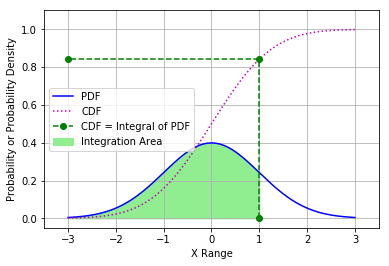

In [3]:
x = linspace(-3,3,1000)      # an array of x axis values
f = norm.pdf(x,0,1)          # two functions of x in arrays the same size as x
g = norm.cdf(x,0,1)          # note there is no for loop needed to do the vector math!
plot(x,f,'b',label = 'PDF')  # blue
plot(x,g,'m:',label = 'CDF') # magenta with a dotted line

xto1 = linspace(-3,1,1000)  # a smaller subrange of x
fto1 = norm.pdf(xto1,0,1) 
fill_between(xto1,0,fto1,label = 'Integration Area',color='lightgreen')

# A line to show CDF(1) = integral block, formatted as 
# green, with circle markers, and dashed lines
plot([1,1,-3],[0,norm.cdf(1,0,1),norm.cdf(1,0,1)],'go--',label="CDF = Integral of PDF") 

legend(loc=6)
xlabel('X Range')
ylabel('Probability or Probability Density')
grid()
axis([-3.5,3.5,-0.05,1.1])


# Plotting Data with Error Bars

No plot of measured data is complete without a clear indication of the uncertainty in the measurements. That could be in words: "All temperature data +/- 2.5C uncertainty." It could also be expressed with graphics universally known as "error bars" even though they are used to represent a variety of different quantities. 

In [4]:
# Generate a selection of data to plot -- don't worry about these details
n1 = 10
n2 = 20
xm1 = linspace(-2.9,2.9,n1)+0.2*random.randn(n1)
fm1 = sin(xm1) + 0.1*random.randn(n1)
u1 = 0.2 + 0.1 * random.randn(n1)

xm2 = linspace(-3,3,n2)+0.1*random.randn(n2)
u2 = 0.2 + 0.1 * random.randn(n2)
hm2 = 0.5 * (sin(xm2)+cos(xm2)) + 0.1*random.randn(n2)

Note that errorbar( ) adds some arguments and the format is no longer a positional argument like in plot( ). The keyword argument (kwarg) fmt = 'm.' uses the same set of codes as in the plot( ) function.

[-3.5, 3.5, -1.5, 1.5]

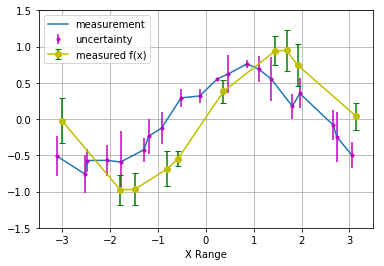

In [7]:
plot(xm2,hm2,label = 'measurement')

#errorbar(xm2,hm2,u2,label = 'no options')

# fmt = 'm.' doesn't include a line specifier, 
# so you just get the point markers and the bars
errorbar(xm2,hm2,u2,fmt = 'm.',label = 'uncertainty')

# other kwargs like ecolor and capsize let you customize
errorbar(xm1,fm1,u1,label='measured f(x)',fmt='yo-',ecolor='green',capsize=3)

legend()
xlabel('X Range')
grid()
axis([-3.5,3.5,-1.5,1.5])

## Histograms
Histograms are used to show the distribution of values in a set of data. Creating them in a spreadsheet can be really tedious. Setting alpha to less than 1 makes parts of your plots semi-transparent so things behind them remain visible. Experiment with changing the values to see the visual effect. Setting the bins explicitly plots them all in the same format. Note how the last function call chooses the bin width independently. Try a simmple single histogram with hist(r2).

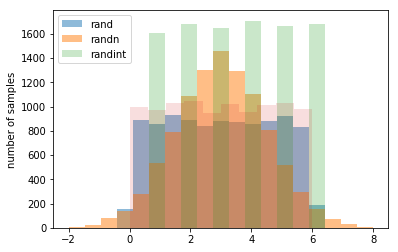

In [4]:
n = 10000
r1 = random.rand(n) * 6         # uniformly distributed random values between 1 and 6
r2 = random.randn(n) * 1.5 + 3  # normally distributed random values, mean 3, SD 1.5
r3 = random.randint(1,7,n)      # uniformly distributed random integers between 1 and 6
hist(r1,alpha=0.5, bins = linspace(-2,8,20), label = 'rand')
hist(r2,alpha=0.5, bins = linspace(-2,8,20), label = 'randn')
hist(r3,alpha=0.25, bins = linspace(-2,8,20), label = 'randint')
hist(r1,alpha=0.15)
ylabel('number of samples')
legend()


(array([  11.,  123.,  541., 1643., 2724., 2726., 1568.,  534.,  117.,
          13.]),
 array([-2.53451726, -1.42271477, -0.31091228,  0.80089021,  1.91269269,
         3.02449518,  4.13629767,  5.24810016,  6.35990265,  7.47170514,
         8.58350762]),
 <a list of 10 Patch objects>)

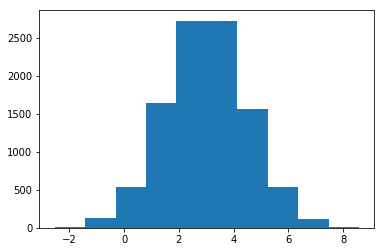

In [5]:
hist(r2)

## Combine normalized histograms with pdf plots
A probability density function integrated over the full range of possible values must yield 1. Choosing density = True for a histogram forces it's integral to be 1 to make the comparison easy.

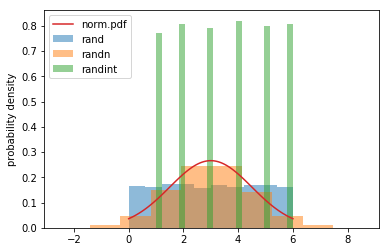

In [6]:
x1 = linspace(0,6,100)
f1 = norm.pdf(x1,3,1.5) 
hist(r1,alpha=0.5, label = 'rand', density=1)
hist(r2,alpha=0.5, label = 'randn', density=True)
hist(r3,alpha=0.5,bins = 24, label = 'randint', density=True)
plot(x1,f1,label = 'norm.pdf')
ylabel('probability density')
legend()